# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data File

In [2]:
path_apo  = '/home/jackh/plasmepsin/explaining_H164_pKa/apo/data'
path_holo = '/home/jackh/plasmepsin/explaining_H164_pKa/holo/data'

# Collect Data

In [3]:
def data_collect(path, phs, stages):
    data = []
    for ph in phs:
        data_sub = []
        for stage in stages:
            with open(f'{path}/pH_{ph}_stage_{stage}.dat', 'r') as f:
                for line in f:
                    if '#' not in line:
                        split_line = re.split('\s+', line)
                        split_line = split_line[:-1]
                        dat_list = [float(dat) for dat in split_line]
                        data_sub.append(dat_list)
        data.append(data_sub)                        
    return data

In [4]:
phs = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
apo_data  = data_collect(path_apo, phs, [x for x in range(11, 65+1)])
holo_data = data_collect(path_holo, phs, [x for x in range(21, 42+1)]) 

# Process Data

In [5]:
def H164_proc(data):
    final_data = []
    for datum in data:
        count = 0 
        for dat in datum:
            if dat[0] <= 2.4 or dat[1] <= 2.4 or dat[2] <= 2.4 or dat[3] <= 2.4:
                count += 1
        final_data.append(count/len(datum))
    return final_data

In [6]:
apo_vals  = H164_proc(apo_data)
holo_vals = H164_proc(holo_data) 

# Plot Data Settings

## Colors

In [9]:
Color1 = ('#00FF17') # Green 
Color2 = ('#0069FF') # Blue
Color3 = ('#FF00E8') # Pink 
Color4 = ('#FF9700') # Orange 
Colors = [Color1, Color2, Color3, Color4]

## Global Settings

In [10]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [11]:
ink_x = 1.4 # 1.4
ink_y = 1.1 # 1.4

ink_markersize  = 2
ink_linewidth = 1.0

# Make Water Count Plots

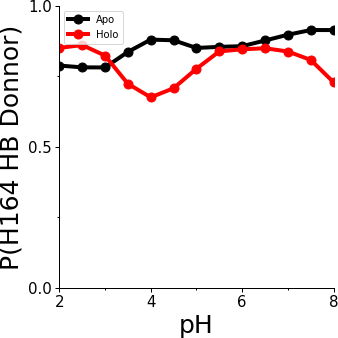

In [18]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot(phs, apo_vals, 'o-', color='Black', markersize=9, linewidth=4)
axes.plot(phs, holo_vals, 'o-', color='red', markersize=9, linewidth=4)

# plot labels
legend = ['Apo', 'Holo']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=25)
axes.set_ylabel('P(H164 HB Donnor)', fontsize=25)

# plot details
axes.legend(legend)
axes.tick_params(axis='both', labelsize=15)

# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0.0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(2, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
plt.savefig("H164_HB_donnor_SI.pdf")
plt.show()